In [1]:
!pip install "gspread==6.1.3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2


In [6]:
sheets_link = "https://docs.google.com/spreadsheets/d/1pPddxC4NHOInTeO2IfNzHOHsLWVEGtshseqXhA2YJ8M/edit?gid=0#gid=0"

In [89]:
import gspread

key = "gspread_api"
gc = gspread.api_key(key)

sh = gc.open_by_key("1pPddxC4NHOInTeO2IfNzHOHsLWVEGtshseqXhA2YJ8M")

In [14]:
import pandas as pd

worksheet = sh.sheet1

data = worksheet.get_all_values()

df = pd.DataFrame(data[1:], columns=data[0])

df.head(10)

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,,,
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,,,
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,,,,
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,,,,
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,,,
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,,,
8,1030547538129,Urgent Assistance Needed,"Hello Support Team,\n\n\nI am reaching out to ...","Dear <name>,\n\n\nWe appreciate you reaching o...",Request,IT Support,high,en,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Customer Service,Technical Guidance,,,
9,1033012757171,Anmeldeprobleme mit Microsoft Surface Pro 7,"Sehr geehrter Tech Online Store Support,\n\n\n...","Sehr geehrter <name>,\n\n\nVielen Dank, dass S...",Problem,Technical Support,high,de,Tech Online Store,Login Issue,Technical Support,Product Support,Warranty Claim,Technical Guidance,Problem Resolution,,,


In [10]:
#subject: Brief summary of the ticket issue.
#body: Detailed description of the customer's problem.
#answer: Respond given by the helpdesk team.
#type: Type of ticket (e.g., Incident, Request, Problem).
#queue: The team or department responsible (e.g., Technical Support, Sales).
#priority: Urgency level (e.g., high, medium, low).
#language: Language in which the ticket is written (e.g., English, German).
#tags: Various tags associated with the ticket, describing key issues or contexts.

In [8]:
df.shape

(1566, 18)

In [9]:
df["language"].value_counts()

,count
language,
de,397
es,379
en,339
pt,229
fr,222


In [13]:
#1.Use Algorithms to find recurring issues (eg Clustering, Cosine Similarity etc).{using subject and body}

In [20]:
!pip install nltk

In [25]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

file_path = '/content/data.csv'
df = pd.read_csv(file_path)

# Combine 'subject' and 'body' columns
df['text'] = df['subject'].fillna('') + " " + df['body'].fillna('')

# Drop rows with empty text
df = df[df['text'].str.strip() != '']

# Clean and normalize text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

cleaned_texts = df['cleaned_text'].tolist()

In [28]:
df.head(10)

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,text,cleaned_text
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN,Urgent: Critical impact on enterprise network ...,urgent critical impact enterprise network conn...
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN,Intermittent Cursor Freezing Issue on Dell XPS...,intermittent cursor freezing issue dell xps de...
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN,Dringend: Unterstützung für die Datenwiederher...,dringend unterstützung für die datenwiederhers...
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN,Anfrage zu den MacBook Air M1 Funktionen Sehr ...,anfrage zu den macbook air funktionen sehr gee...
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN,Solicitação de Assistência com Erro de Instala...,solicitação de assistência com erro de instala...
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,NaN,NaN,NaN,NaN,Exchange Request for Malfunctioning Dell XPS 1...,exchange request malfunctioning dell xps dear ...
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,NaN,NaN,NaN,Request for Server Administration Assistance D...,request server administration assistance dear ...
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN,Immediate Attention Required: AWS Outage Conce...,immediate attention required aws outage concer...
8,1030547538129,Urgent Assistance Needed,"Hello Support Team,\n\n\nI am reaching out to ...","Dear <name>,\n\n\nWe appreciate you reaching o...",Request,IT Support,high,en,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Customer Service,Technical Guidance,NaN,NaN,NaN,"Urgent Assistance Needed Hello Support Team,\n...",urgent assistance needed hello support team re...
9,1033012757171,Anmeldeprobleme mit Micros

In [31]:
#tf-idf for cleaned text col
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame and contains the 'answer' column.
# If not loaded, load your DataFrame first. For example:
# df = pd.read_json('preprocessed_data.json')


def create_tfidf_for_cleaned_text(df):
    """
    Creates TF-IDF vectors for the 'answer' column in a DataFrame.
    """

    vectorizer = TfidfVectorizer()  # Initialize the TF-IDF vectorizer

    # Fit and transform the 'answer' column
    tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'].astype(str))

    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame from the TF-IDF matrix
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    return tfidf_df

In [34]:
tfidf_cleaned_text = create_tfidf_for_cleaned_text(df)
tfidf_cleaned_text.head()

,ab,abaixo,abbricht,abbuchung,abend,aber,aberto,abertos,abfragen,abgebrochen,...,übersehen,überwache,überwachen,überwacht,überwachung,überwiegend,üblichen,œuvre,высокую,производительность
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
tfidf_cleaned_text.shape

(1566, 12112)

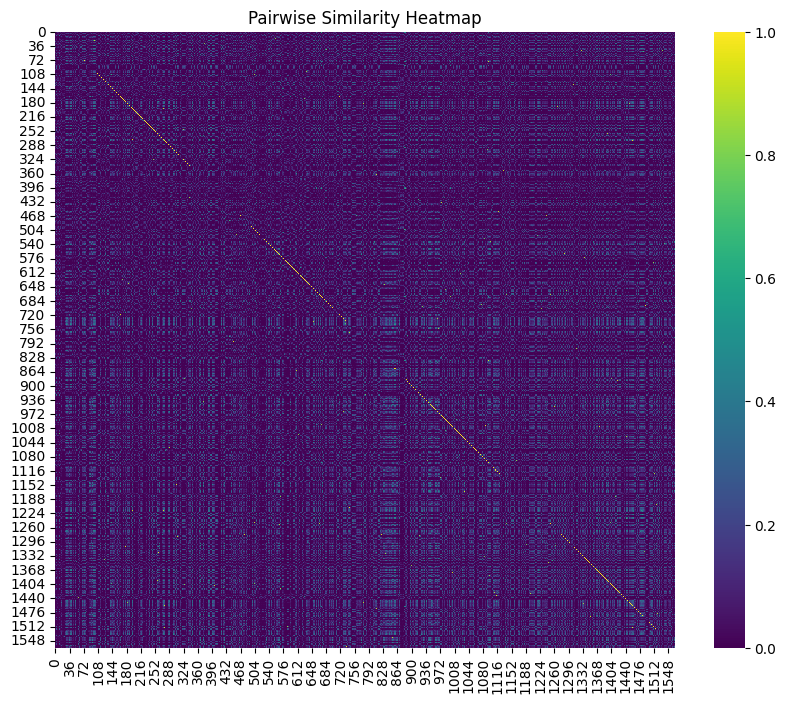

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming tfidf_answers is your TF-IDF matrix DataFrame
# Calculate pairwise cosine similarity(dot product)
similarity_matrix = cosine_similarity(tfidf_cleaned_text)

# Convert to DataFrame for easier handling
similarity_df = pd.DataFrame(similarity_matrix)

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(similarity_df, cmap="viridis")  # Use a suitable colormap
plt.title("Pairwise Similarity Heatmap")
plt.show()

In [43]:
#similarity mtrix
similarity_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565
0,1.000000,0.076042,0.000000,0.000367,0.000456,0.041358,0.086203,0.171584,0.127879,0.007562,...,0.020778,0.001002,0.012804,0.008993,0.000961,0.166295,0.006588,0.001408,0.011134,0.000476
1,0.076042,1.000000,0.000000,0.003444,0.000387,0.119006,0.057415,0.085112,0.075043,0.009577,...,0.010403,0.003039,0.005097,0.006282,0.002915,0.058687,0.003134,0.004270,0.008126,0.003599
2,0.000000,0.000000,1.000000,0.077795,0.003472,0.000000,0.000000,0.000000,0.000000,0.085891,...,0.151919,0.125175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000367,0.003444,0.077795,1.000000,0.001586,0.001233,0.003609,0.001167,0.000967,0.297659,...,0.200446,0.208546,0.000494,0.000286,0.006346,0.001146,0.000524,0.001905,0.001047,0.002757
4,0.000456,0.000387,0.003472,0.001586,1.000000,0.000484,0.000743,0.004660,0.045075,0.009916,...,0.007105,0.000809,0.115881,0.084045,0.149406,0.000450,0.056462,0.163874,0.047203,0.077151


In [44]:
similarity_df.shape

(1566, 1566)

        PC1       PC2       PC3
0 -0.109379  0.233509 -0.285863
1 -0.092300  0.167911 -0.204769
2 -0.238642 -0.055280  0.026168
3 -0.398691 -0.178156  0.121977
4  0.165793 -0.059904 -0.071260
Explained variance ratio: [0.06890516 0.03771025 0.03204994]


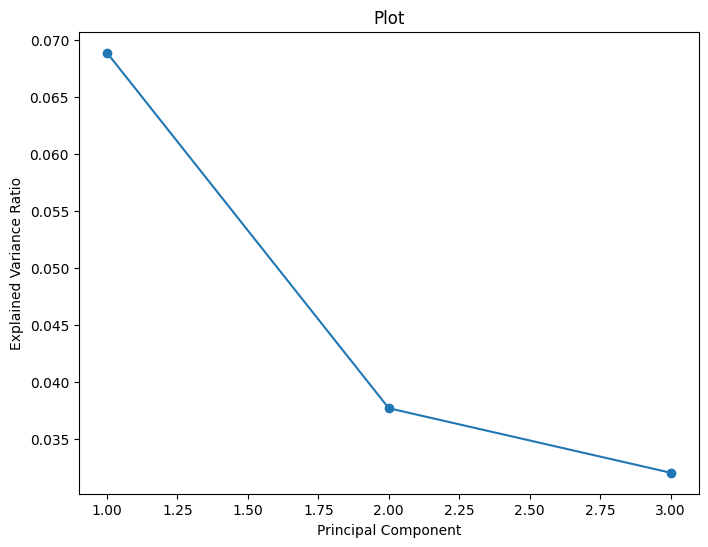

In [46]:
#to reduce dimentionality
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming tfidf_answers is your TF-IDF matrix DataFrame as defined in the previous code.

# Initialize PCA with the desired number of components
pca = PCA(n_components=3)

# Fit and transform the data
pca_result = pca.fit_transform(tfidf_cleaned_text)

# Create a DataFrame from the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Print the top 3 principal components
print(pca_df.head())

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Plot")
plt.show()

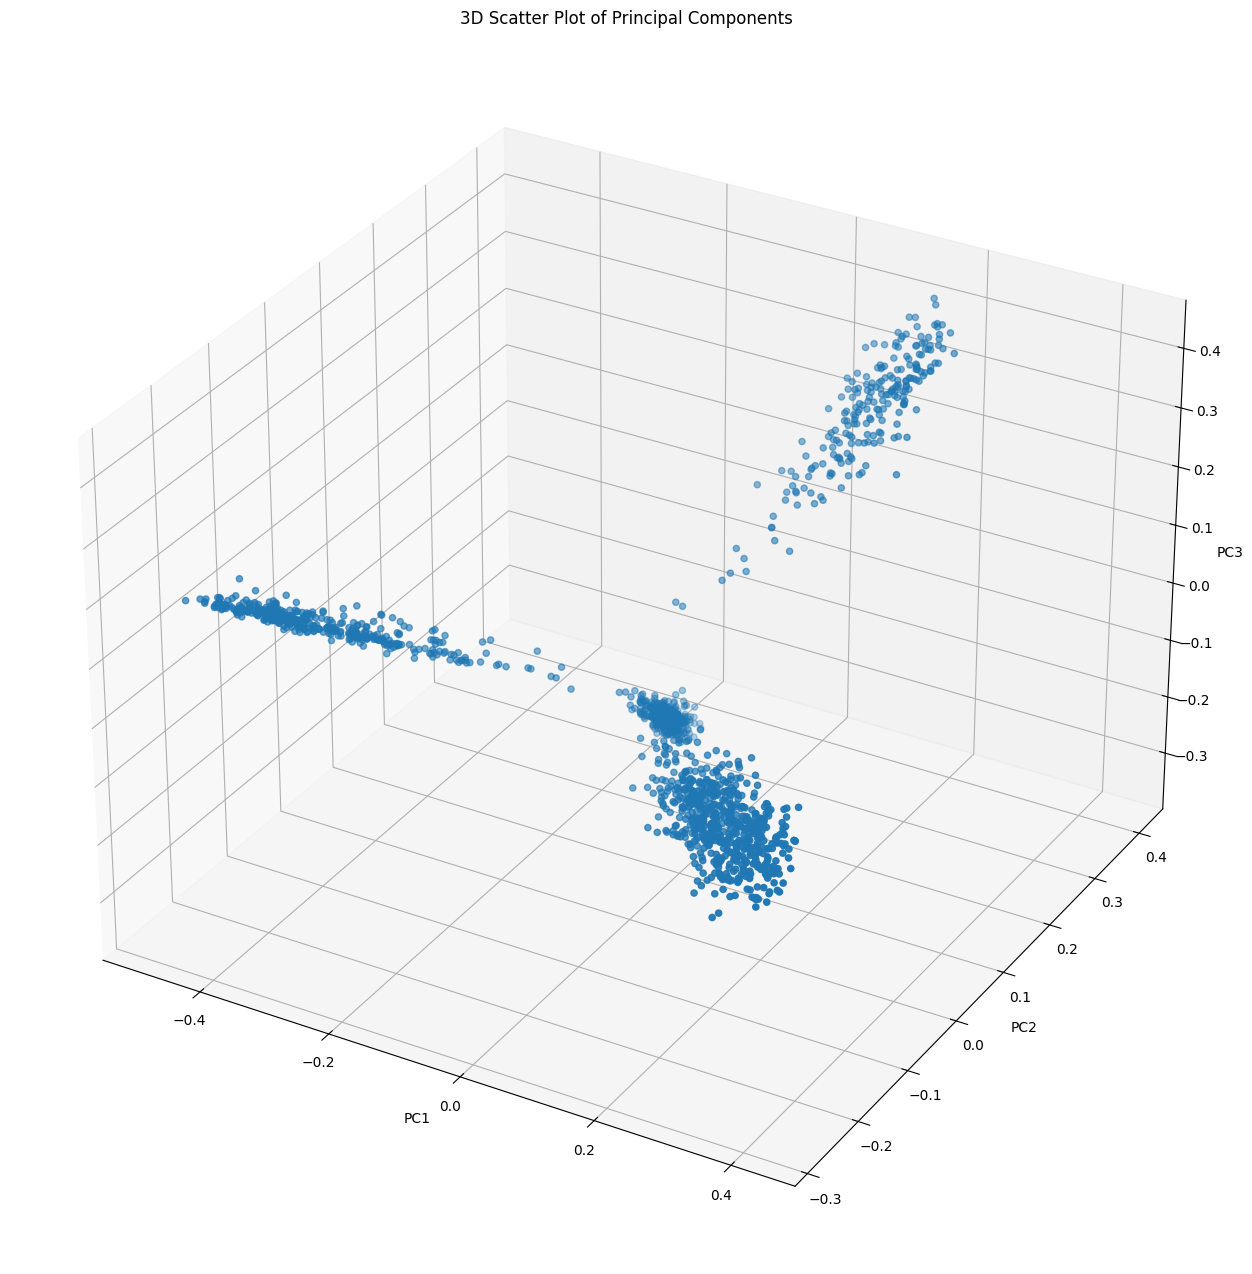

In [47]:
# Create the 3D scatter plot
plt.figure(figsize=(20, 16))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Scatter Plot of Principal Components')
plt.show()

       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -0.109379  0.233509 -0.285863 -0.101142  0.014827  0.178996 -0.003005   
1 -0.092300  0.167911 -0.204769 -0.048172 -0.183780  0.332188  0.424529   
2 -0.238642 -0.055280  0.026168  0.004303  0.067734  0.047369 -0.102763   
3 -0.398691 -0.178156  0.121977 -0.007781 -0.088105 -0.127521  0.022418   
4  0.165793 -0.059904 -0.071260  0.282118 -0.006612  0.018593 -0.019098   

       PCA8      PCA9     PCA10  
0 -0.181301  0.032560 -0.041442  
1  0.399139 -0.122268  0.023616  
2  0.059553 -0.059511  0.036113  
3  0.011497 -0.100524 -0.140760  
4 -0.003587  0.022728 -0.004658  
Explained variance ratio: [0.06890516 0.03771025 0.03204994 0.02288614 0.01056213 0.00843161
 0.00752249 0.00708678 0.00634158 0.00620806]


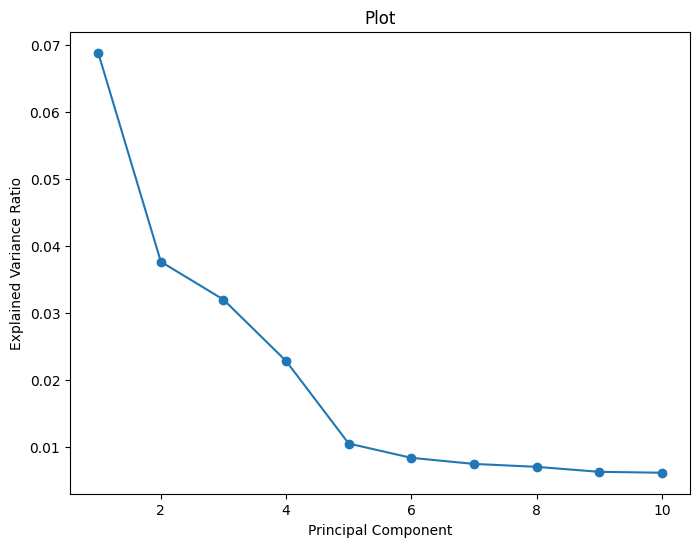

In [49]:
#top 4 pca
pca = PCA(n_components=10)

# Fit and transform the data
pca_result = pca.fit_transform(tfidf_cleaned_text)

# Create a DataFrame from the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PCA{i+1}'for i in range(10)])

# Print the top 4 principal components
print(pca_df.head())

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")

# plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Plot")
plt.show()

In [50]:
sum(pca.explained_variance_ratio_[:4])*100

16.155148607437667

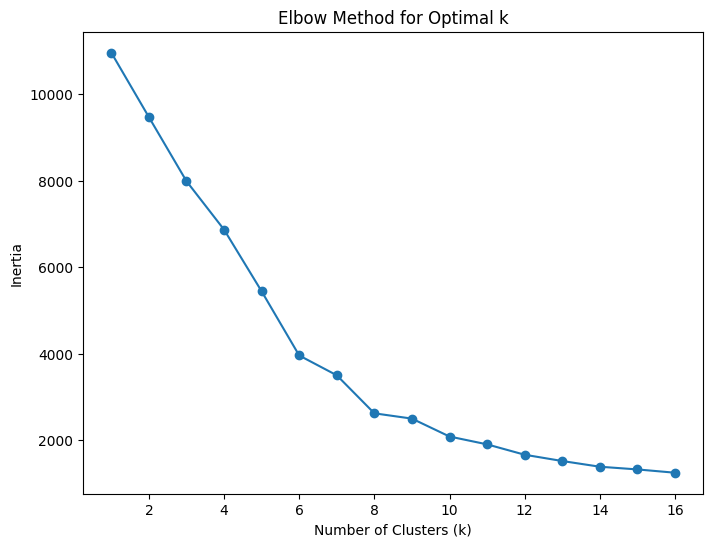

In [53]:
# use kmeans clustering and elbow bethod to find optimal numbers of clusters

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=7)

# Fit and transform the data
pca_result = pca.fit_transform(tfidf_cleaned_text)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_result)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 17):  # Test k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 17), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [54]:
kmeans = KMeans(n_clusters=8, random_state=34)
kmeans.fit(scaled_data)

KMeans(random_state=34)

In [55]:
df["label_cleaned_text"] = kmeans.labels_

In [57]:
df.head(10)

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,...,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,text,cleaned_text,label_cleaned_text
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,...,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN,Urgent: Critical impact on enterprise network ...,urgent critical impact enterprise network conn...,1
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,...,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN,Intermittent Cursor Freezing Issue on Dell XPS...,intermittent cursor freezing issue dell xps de...,6
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,...,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN,Dringend: Unterstützung für die Datenwiederher...,dringend unterstützung für die datenwiederhers...,0
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,...,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN,Anfrage zu den MacBook Air M1 Funktionen Sehr ...,anfrage zu den macbook air funktionen sehr gee...,3
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,...,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN,Solicitação de Assistência com Erro de Instala...,solicitação de assistência com erro de instala...,4
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,...,Customer Service,Technical Support,Order Issue,NaN,NaN,NaN,NaN,Exchange Request for Malfunctioning Dell XPS 1...,exchange request malfunctioning dell xps dear ...,1
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,...,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,NaN,NaN,NaN,Request for Server Administration Assistance D...,request server administration assistance dear ...,1
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,...,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN,Immediate Attention Required: AWS Outage Conce...,immediate attention required aws outage concer...,1
8,1030547538129,Urgent Assistance Needed,"Hello Support Team,\n\n\nI am reaching out to ...","Dear <name>,\n\n\nWe appreciate you reaching o...",Request,IT Support,high,en,IT Services,Technical Support,...,Urgent Issue,Problem Resolution,Customer Service,Technical Guidance,NaN,NaN,NaN,"Urgent Assistance Needed Hello Support Team,\n...",urgent assistance needed hello support team re...,1
9,1033012757171,Anmeldeprobleme mit Microsoft Surface Pro 7,"Sehr geehrter Tech Online Store Support,\

In [58]:
df["label_cleaned_text"].value_counts()

,count
label_cleaned_text,
1,343
4,222
5,217
0,209
2,193
7,185
3,173
6,24


In [62]:
# Analyze clusters
for i in range(8):
    print(f"Cluster {i+1}:")
    print(df[df['label_cleaned_text'] == i]['cleaned_text'].head(10))
    print()

Cluster 1:
2      dringend unterstützung für die datenwiederhers...
17     dringend unterstützung benötigt für mysql date...
29     dringende hilfe benötigt aws bereitstellungspr...
30     anfrage zur optimierung der aws cloud ressourc...
35     dringend störung im jira ticketsystem hallo ku...
58     probleme mit der bereitstellung des aws manage...
60     dringende unterstützung für aws optimierung er...
90     anfrage zur unterstützung bei der skalierung d...
109    dringendes problem e mail zugriff office sehr ...
111    netzwerkprobleme mit cisco router sehr geehrte...
Name: cleaned_text, dtype: object

Cluster 2:
0     urgent critical impact enterprise network conn...
5     exchange request malfunctioning dell xps dear ...
6     request server administration assistance dear ...
7     immediate attention required aws outage concer...
8     urgent assistance needed hello support team re...
11    bug report ui bug react app hi customer suppor...
13    urgent aws web access issue res

In [63]:
#2. Finalize one or more issue categories to automate.

In [73]:
import pandas as pd
from itertools import product
from tqdm import tqdm
import matplotlib.pyplot as plt

# Step 1: Define columns and combinations
columns_to_combine = ["type", "queue", "priority", "language", "business_type", "tag_1", "label_cleaned_text"]

# Extract unique values
unique_values = {col: df[col].unique() for col in columns_to_combine}

# Generate all possible combinations
all_combinations = list(product(*unique_values.values()))
combinations_df = pd.DataFrame(all_combinations, columns=columns_to_combine)

# Step 2: Function to count rows for each combination
def get_row_counts(df, combinations_df):
    row_counts = []
    for _, row in tqdm(combinations_df.iterrows(), total=combinations_df.shape[0]):
        # Create a boolean mask
        mask = True
        for col in columns_to_combine:
            mask &= (df[col] == row[col])
        row_counts.append(df[mask].shape[0])
    return row_counts

In [74]:
combinations_df['row_count'] = get_row_counts(df, combinations_df)

combinations_df = combinations_df[combinations_df['row_count'] > 0]

100%|██████████| 600000/600000 [29:11<00:00, 342.50it/s]


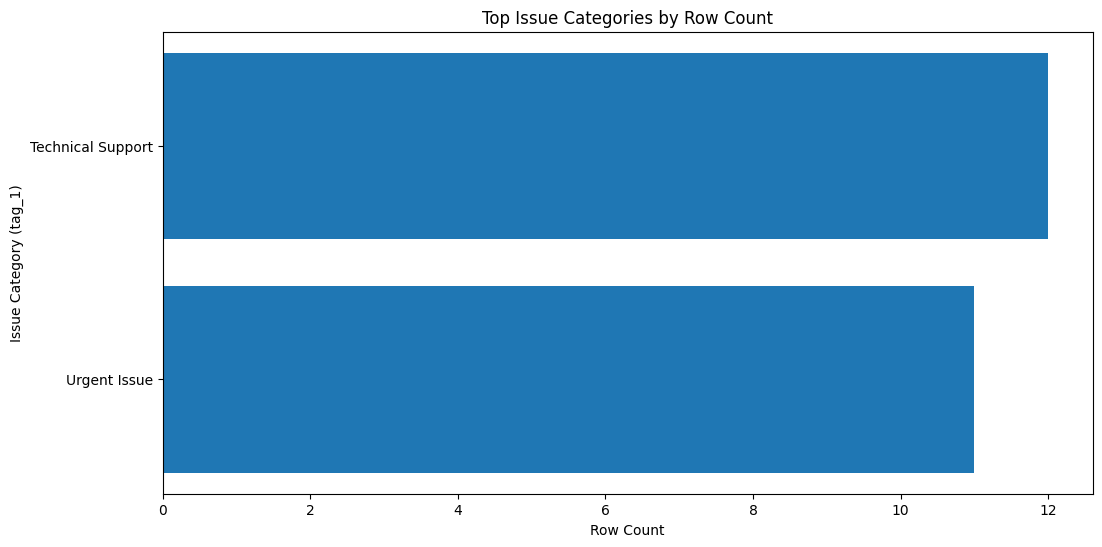

Finalized Issue Categories for Automation:
            type              queue priority language      business_type  \
8       Incident  Technical Support     high       en        IT Services   
1074    Incident  Technical Support     high       de        IT Services   
3077    Incident  Technical Support     high       es        IT Services   
166211   Request    Product Support     high       de  Tech Online Store   
25208   Incident    Product Support   medium       en  Tech Online Store   
26211   Incident    Product Support   medium       de  Tech Online Store   
253215   Request   Customer Service   medium       es  Tech Online Store   
27212   Incident    Product Support   medium       pt  Tech Online Store   
15208   Incident    Product Support     high       en  Tech Online Store   
16211   Incident    Product Support     high       de  Tech Online Store   

                    tag_1  label_cleaned_text  row_count  
8       Technical Support                   1         12  
10

In [82]:
threshold = 0  # Define a threshold for frequent combinations
high_frequency_combinations = combinations_df[combinations_df['row_count'] > threshold]
high_frequency_combinations.sort_values(by='row_count', ascending=False, inplace=True)
plt.figure(figsize=(12, 6))
plt.barh(high_frequency_combinations["tag_1"].head(10), high_frequency_combinations["row_count"].head(10))
plt.xlabel("Row Count")
plt.ylabel("Issue Category (tag_1)")
plt.title("Top Issue Categories by Row Count")
plt.gca().invert_yaxis()
plt.show()

finalized_categories = high_frequency_combinations.head(10)
print("Finalized Issue Categories for Automation:")
print(finalized_categories)

In [83]:
#3. Make template(s) using ChatGPT for selected issue categories.
templates = {
    "Technical Support": """
        Hello {customer_name},

        Thank you for reaching out regarding {issue_type}. Our technical support team recommends the following steps:
        1. {step_1}
        2. {step_2}

        If the issue persists, please contact us again with additional details.

        Best regards,
        Support Team
    """,
    "Urgent Issue": """
        Hello {customer_name},

        Your issue categorized as '{issue_type}' has been prioritized. Please take the following immediate actions:
        1. {step_1}
        2. {step_2}

        Our team is already working to resolve this. You will be notified upon resolution.

        Regards,
        The Support Team
    """,
}


In [84]:
# Example dictionary of variables for injection
issue_variables = {
    "Technical Support": {
        "issue_type": "Software Bug",
        "customer_name": "John Doe",
        "step_1": "Restart your system",
        "step_2": "Check for updates in the application settings",
    },
    "Urgent Issue": {
        "issue_type": "Service Disruption",
        "customer_name": "Jane Doe",
        "step_1": "Ensure your device is connected to a stable network",
        "step_2": "Contact your account manager for immediate assistance",
    },
}

In [85]:
#4. Save variables you will be injecting (eg Issue Type, Steps to Follow) in a dictionary, file or database to access and inject them in template before sending template as response to customer.
#5. Make a pipeline to check if incoming issue falls in your shortlisted issue category(/ies) and respond with an automated response if it does. (One Python function for this pipeline)
def automated_response(issue_data, templates, issue_variables):
    """
    Pipeline to generate automated responses for shortlisted issue categories.

    Parameters:
        issue_data (dict): Incoming issue data with fields like 'tag_1', 'priority', etc.
        templates (dict): Predefined templates for issue categories.
        issue_variables (dict): Variable definitions for template injection.

    Returns:
        str: Automated response if issue category matches; otherwise, None.
    """
    # Check if the issue matches shortlisted categories
    category = issue_data.get("tag_1")  # Example: Using 'tag_1' as the category
    if category in templates:
        # Fetch the template and variables
        template = templates[category]
        variables = issue_variables.get(category, {})

        # Inject variables into the template
        response = template.format(**variables)
        return response
    else:
        # If issue does not match, return None or a default response
        return "This issue is not automated yet. A support representative will assist you shortly."


In [86]:
# Incoming issue data
incoming_issue = {
    "tag_1": "Technical Support",
    "priority": "high",
    "queue": "Technical Support",
}

# Generate an automated response
response = automated_response(incoming_issue, templates, issue_variables)
print(response)



        Hello John Doe,
        
        Thank you for reaching out regarding Software Bug. Our technical support team recommends the following steps:
        1. Restart your system
        2. Check for updates in the application settings
        
        If the issue persists, please contact us again with additional details.
        
        Best regards,
        Support Team
    
